In [38]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation
from keras.activations import elu
from keras.constraints import maxnorm
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from keras.utils.vis_utils import plot_model
from keras.models import load_model
from time import perf_counter 

In [12]:
from time import perf_counter 

In [3]:
from fonction import *

In [4]:
# Definition of the path of the data
data_path = 'C:\\Users\\pierr\\Desktop\\Projet de semestre I\\data\\data_set_2.csv'

In [5]:
# load the data 
data = np.loadtxt(data_path, delimiter=',')
ind = data[:,0]
data= data[:,1:]
data.shape

(125360, 23)

In [6]:
indice_neg_data = modifie_negative_angle(data)

In [7]:
X_train, X_test, Y_train, Y_test = data_split(data)

In [8]:
# check the size of the training and test set :
print(" the size of X_train is ",np.shape(X_train))
print(" the size of X_test is ",np.shape(X_test))
print(" the size of Y_train is ",np.shape(Y_train))
print(" the size of Y_test is ",np.shape(Y_test))

 the size of X_train is  (100288, 22)
 the size of X_test is  (25072, 22)
 the size of Y_train is  (100288, 1)
 the size of Y_test is  (25072, 1)


In [8]:
def build_model_base_line(summary = True):
    
    #architecture
    model = Sequential()
    model.add(Dense(1 ,input_shape=(22,)))
    if summary :
        print(model.summary())
    
    #optimiser 
    model.compile(loss='mean_squared_error',optimizer='adam')
    return model

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 23        
Total params: 23
Trainable params: 23
Non-trainable params: 0
_________________________________________________________________
None
Epoch 00139: early stopping
MSE Train: 0.661 | MSE Test: 0.663


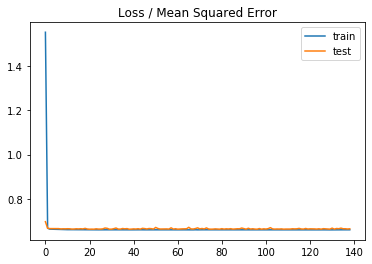

(0.6611958659980885, 0.6625274780379333)

In [9]:
model_base = build_model_base_line()
patience_ = 100
model_training(model_base,X_train, X_test , Y_train, Y_test, patience_ )

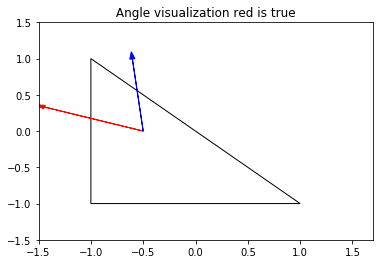

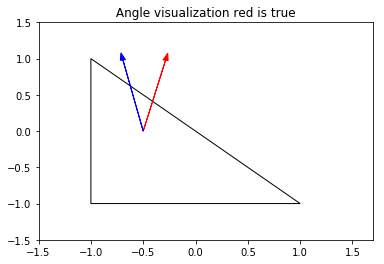

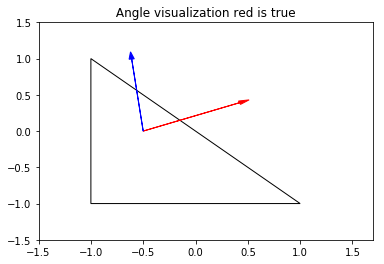

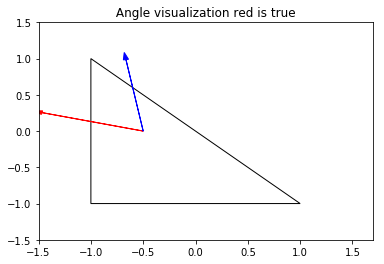

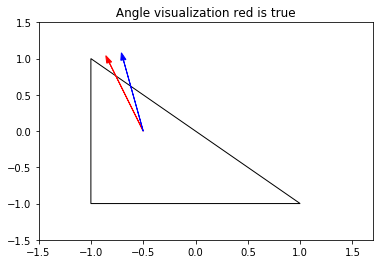

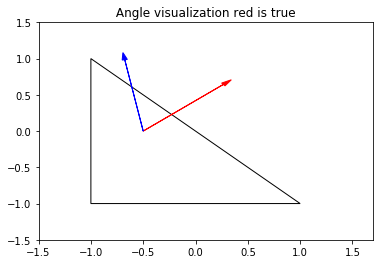

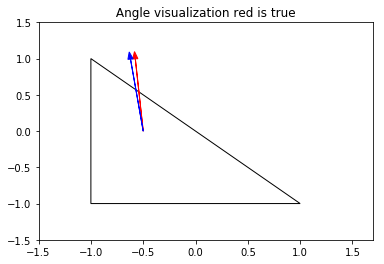

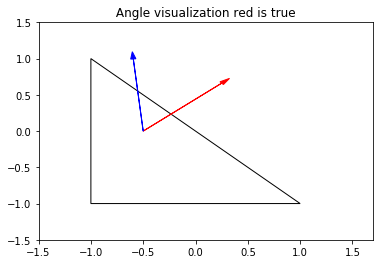

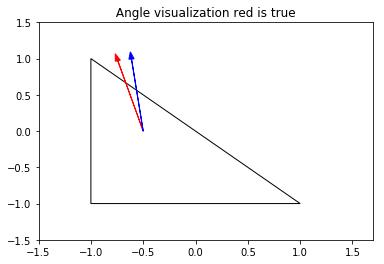

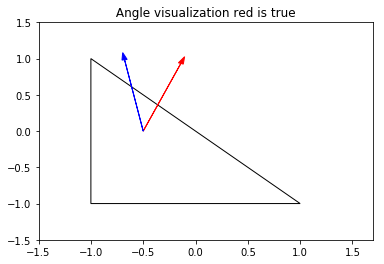

In [10]:
angle_visualization(model_base , X_test , Y_test)

In [27]:
def build_model_3_tanh(summary = True):
    
    #architecture
    model = Sequential()
    model.add(Dense(12 ,input_shape=(22,),activation = 'tanh'))
    model.add(Dense(12,activation = 'tanh'))
    model.add(Dense(12,activation = 'tanh'))
    model.add(Dense(1))
    if summary:
        print(model.summary())
    
    #optimiser 
    model.compile(loss='mean_squared_error',optimizer='Adadelta')
    return model

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 12)                276       
_________________________________________________________________
dense_10 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_11 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 13        
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________
None
Epoch 00352: early stopping
MSE Train: 0.256 | MSE Test: 0.258


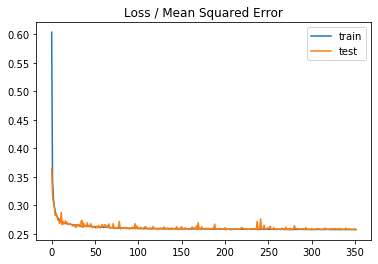

Training time is : 674.8413112999997 in seconds:


In [13]:
model_3_tanh = build_model_3_tanh()
patience_ = 150
t1_start = perf_counter()  
model_training(model_3_tanh,X_train, X_test , Y_train, Y_test, patience_ )
#run your code
t1_stop = perf_counter() 
print("Training time is :",t1_stop-t1_start ,"in seconds:")

In [28]:
def training_NN(architecture,X_train, X_test, Y_train, Y_test, name = "model.h5", patience=50, batch=32):
    print("===================NN architecture==========================")
    model = architecture()
    print("=======================training=============================")
    t1_start = perf_counter()  
    train_mse,test_mse = model_training(model, X_train, X_test, Y_train, Y_test, patience_ ,batch)
    #run your code
    t1_stop = perf_counter() 
    print("Training time is :",format((t1_stop-t1_start)/60,'.2f') ," minute")
    print("======================Saving model==========================")
    model.save(name)
    print("Saved model to disk")
    return model , train_mse, test_mse

In [25]:
model = load_model('model_3_tanh_data2.h5')

===================NN architecture==========================
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 12)                276       
_________________________________________________________________
dense_26 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_27 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 13        
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________
None
=======================training=============================
Epoch 00338: early stopping
MSE Train: 0.258 | MSE Test: 0.260


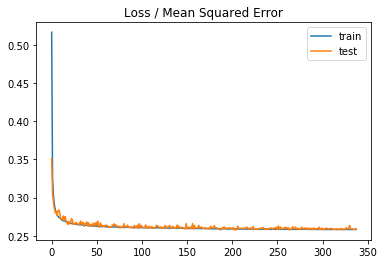

Training time is : 11.64  minute
======================Saving model==========================
Saved model to disk


In [30]:
model_3_tanh, train_mse , test_mse = training_NN(build_model_3_tanh,X_train, X_test, Y_train, Y_test,"model_3_tanh_data2.h5",150)

GPU time : 
CPU time :

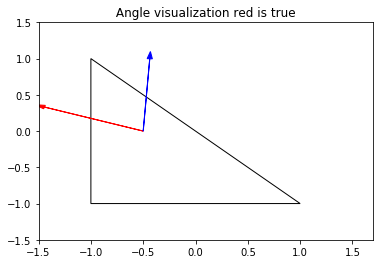

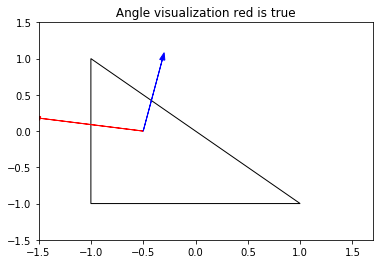

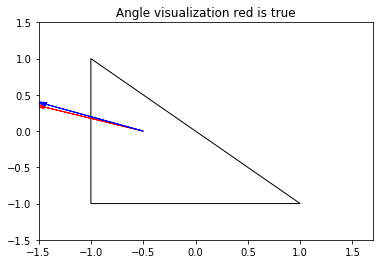

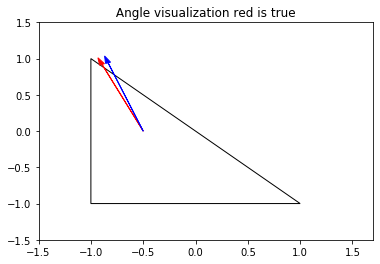

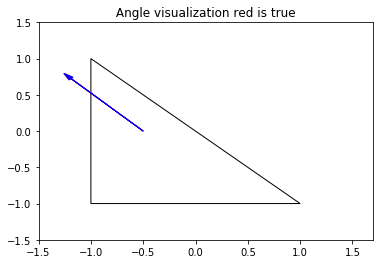

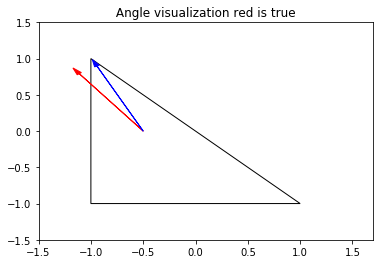

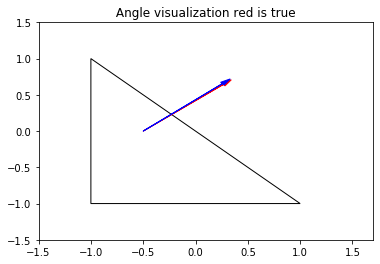

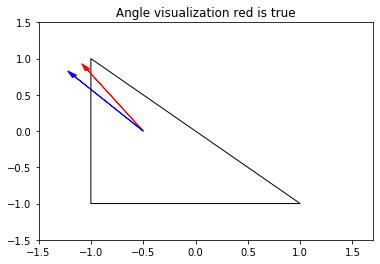

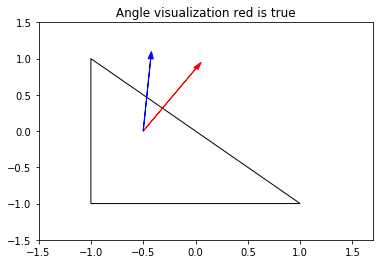

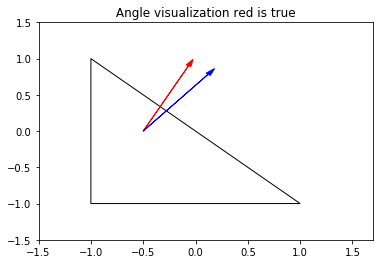

In [31]:
angle_visualization(model , X_test , Y_test)

We can see here that bad prediction such as the 1 , 2 plot correspond to triangle that has the discontinuty in a corner 

In [16]:
X_test[0,:]

array([-0.28571, -0.28571, -0.28571, -0.28571, -0.28571, -0.28571,
       -0.28571, -0.28571, -0.28571,  0.57143, -0.28571, -0.28571,
       -0.28571, -0.28571, -0.28571, -0.28571, -0.28571,  0.57143,
       -0.28571, -0.28571, -0.28571,  0.57143])

In [17]:
X_test[2,:]

array([-1.4286 , -1.4286 ,  0.85714,  0.85714,  0.85714,  0.85714,
        0.85714,  0.85714,  0.85714,  0.85714, -1.4286 , -1.4286 ,
        0.85714,  0.85714,  0.85714,  0.85714,  0.85714,  0.85714,
       -1.4286 ,  0.85714,  0.85714,  0.85714])

In [17]:
X_test[0,:]

array([ 0.,  0., -2., -2.,  0.,  0.,  0.,  0.,  0.,  0.])

Making prediction

In [32]:
data_path_test = 'C:\\Users\\pierr\\Desktop\\Projet de semestre I\\data\\data_test_set_2.csv'

In [43]:
def prediction_on_new_grid(data_path,output_path,model):
    
    print("loading data ... ")
    data_test = np.loadtxt(data_path, delimiter=',')
    print("loading succed")
    
    indice_neg_test = modifie_negative_angle(data_test)
    Y_test =  model.predict(data_test[:,1:-1], verbose=0)
    test_mse = model.evaluate(data_test[:,1:-1],data_test[:,-1], verbose=0)
    print("on a new mesh the mse is :",format(test_mse,'.4f'))
    
    # substract pi to the negative angle after the prediction:
    Y_test[indice_neg_test] -= np.pi
    
    print("saving prediction ...")
    path = os.getcwd()
    np.savetxt(path+output_path,Y_test,delimiter=',')
    print("saving succed")
    
    return test_mse 
    
    
    

In [44]:
test_mse = prediction_on_new_grid(data_path_test,'\data\pred_data_set_2_01.csv',model)

loading data ... 
loading succed
on a new mesh the mse is : 0.0784
saving prediction ...
saving succed
